CAPSTONE PROJECT 2
PRE_SCRIBE: University Retention Guardian

by Irina Kim
Mentor: Joe Xiao

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from ucimlrepo import fetch_ucirepo 

df = pd.read_csv(url, sep=',')

# Normalize column names (fix case and hidden spaces)
df.columns = [c.strip().capitalize() for c in df.columns]

print("Available columns:", df.columns.tolist())

# Now try to access it
if 'Target' in df.columns:
    print("\nSuccess! First 5 rows of Target:")
    print(df['Target'].head())
else:
    print("\n'Target' still not found. Please check the column list above.")

#target_data = df.iloc[:, -1]
#print(target_data.value_counts())

Available columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'Gdp', 'Tar

Value Counts for Target:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage Distribution:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


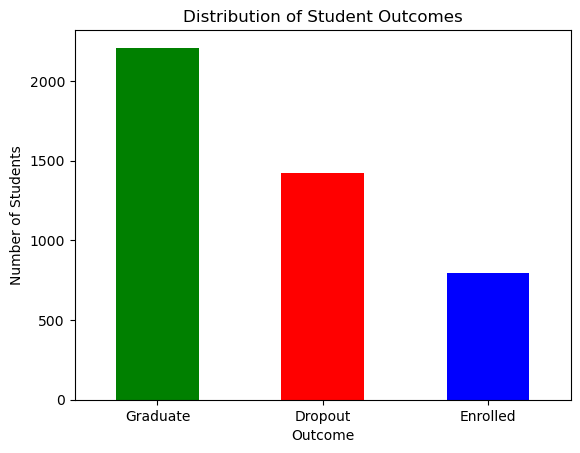

0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object
Cleaned Dataset for Early Warning: (4424, 31)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score
from ucimlrepo import fetch_ucirepo 


# Load Dataset
url = "https://archive.ics.uci.edu/static/public/697/data.csv"
df = pd.read_csv(url, sep=',')

# Fetch dataset 
#df = fetch_ucirepo(id=697)

#print(df.columns)
#print(df.head())
df.columns = df.columns.str.strip()

# Check the unique values and their counts
target_counts = df['Target'].value_counts()
print("Value Counts for Target:")
print(target_counts)

# Calculate percentages
target_pct = df['Target'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(target_pct)

#  Optional: Visualize the distribution
target_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribution of Student Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

print(df['Target'].head())

# Target Transformation (Binary)
# 1 = Dropout (The class we want to catch), 0 = Retained (Enrolled or Graduate)
df['Target'] = df['Target'].map({'Dropout': 1, 'Graduate': 0, 'Enrolled': 0})

# Early Warning Feature Filtering
# Removing 2nd semester features to simulate a "Week 4" prediction capability
cols_to_drop = [col for col in df.columns if '2nd sem' in col]
df_early = df.drop(columns=cols_to_drop)

print(f"Cleaned Dataset for Early Warning: {df_early.shape}")